In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
crsData= pd.read_csv(r'C:\Users\HP\Desktop\Fintech\project2\credit_risk_small_data_0.02.csv')

In [3]:
myData=crsData.copy()
myData

,Delinquency,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
0,0,0.390912,53,0,0.241776,10000,9,0,1,0,2
1,0,0.037574,64,0,0.323588,10500,11,0,2,0,0
2,0,0.002058,59,0,0.458093,16500,12,0,2,0,2
3,0,1.023988,36,0,0.203108,2766,4,0,0,0,3
4,0,0.966603,61,1,0.350550,3000,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2400,0,0.058012,35,0,0.348095,4041,8,0,2,0,3
2401,0,0.024283,91,2,0.118773,5800,7,0,1,0,0
2402,0,0.271156,37,1,0.343996,9127,17,0,1,0,1
2403,0,0.923689,35,0,1.890141,2129,9,0,2,0,0


In [4]:
def doLabel(data):
    label=[]
    
    bad=data['Delinquency']==1
    label.append(bad)
    
    good=data['Delinquency']==0
    label.append(good)
    
    label_name=['bad','good']
    
    return label,label_name

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
def doNormalizaton(data, normalization_bit ):
  if normalization_bit==1:
    normalized_data = StandardScaler().fit_transform(data)
  else:
    normalized_data=MinMaxScaler().fit_transform(data)
  return normalized_data

In [6]:
def doPCA (data,x):
    
    normalized_data=doNormalizaton(data,x)
    pca=PCA()
    newPCAData=pca.fit_transform(normalized_data)

    return newPCAData

In [7]:
from sklearn.manifold import TSNE
def doTSNE (data, perplexity, init):

  normalized_data=doNormalizaton(data,1)

  #normalized_data=MinMaxScaler().fit_transform(data)
  tsne = TSNE(perplexity=perplexity, init=init)
  newData = tsne.fit_transform(normalized_data)

  return newData

In [8]:
def biplot_ez(newData, label, label_name, Method):

  marker_list=['o','p','d','s', '>']
  c_list=['b','gold', 'y', 'lightblue', 'deepblue']
  e_list=['k','g', 'b', 'r', 'orange']
  for i in range(len(label)):
    plt.scatter(newData[label[i], 0], newData[label[i], 1], label=label_name[i],
                marker=marker_list[i], color=c_list[i], edgecolors=e_list[i],  s=75)

  plt.legend(prop={'size':12})

  if Method=='pca' or Method=='PCA':
    plt.xlabel('$PC_{1}$')
    plt.ylabel('$PC_{2}$')
  elif Method=='spca':
    plt.xlabel('$SPC_{1}$')
    plt.ylabel('$SPC_{2}$')
  else:
    plt.xlabel('$'+ Method +'_{1}'+'$')
    plt.ylabel('$'+ Method +'_{2}'+'$')
  
  plt.grid('on')

In [9]:
label,label_name=doLabel(myData)
newPcaData1=doPCA(myData.iloc[:,1::],1)
newPcaData2=doPCA(myData.iloc[:,1::],2)

PCA

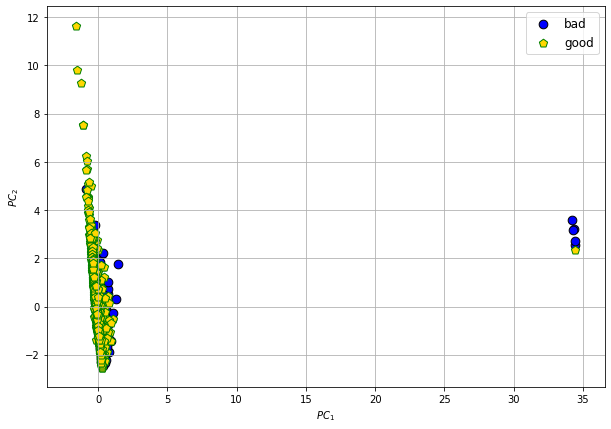

In [10]:
fig=plt.figure(figsize=(10,7))
biplot_ez(newPcaData1,label,label_name,'PCA')

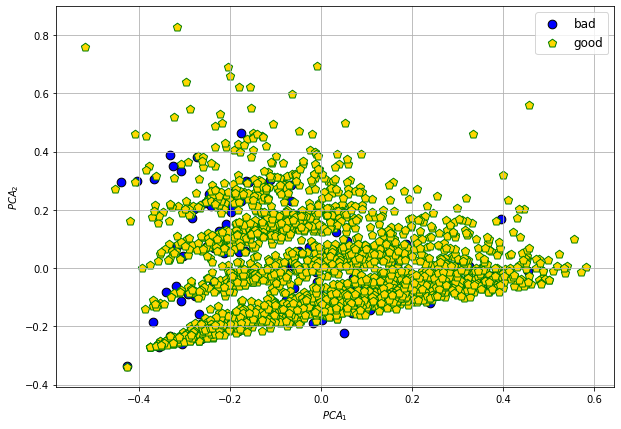

In [11]:
fig=plt.figure(figsize=(10,7))
biplot_ez(newPcaData2,label,label_name,'PCA ')

TSNE

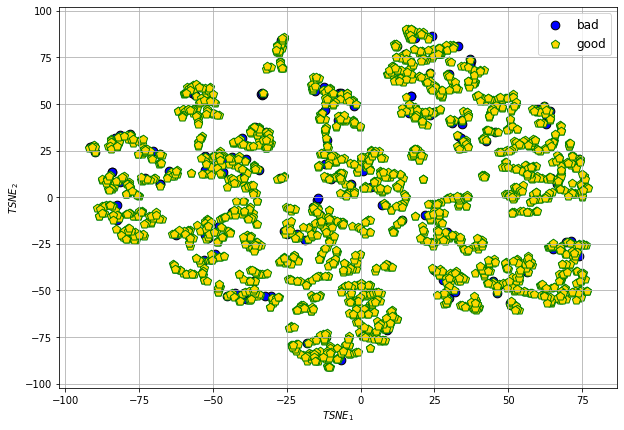

In [12]:
tsneNewData=doTSNE(myData.iloc[:,1::], 10, init='random')
fig=plt.figure(figsize=(10,7))
biplot_ez(tsneNewData, label, label_name, 'TSNE')

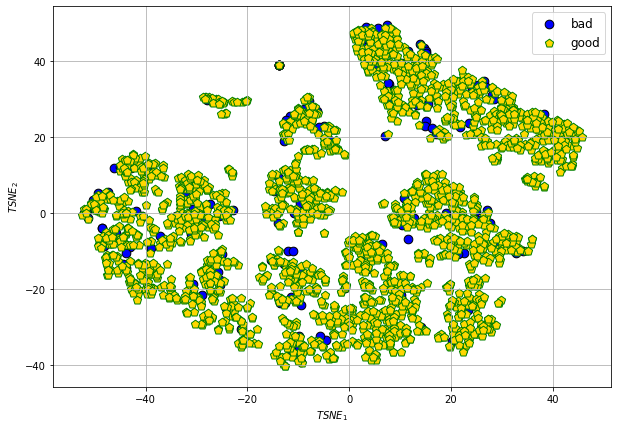

In [13]:
tsneNewData=doTSNE(myData.iloc[:,1::], 50, init='random')
fig=plt.figure(figsize=(10,7))
biplot_ez(tsneNewData, label, label_name, 'TSNE')

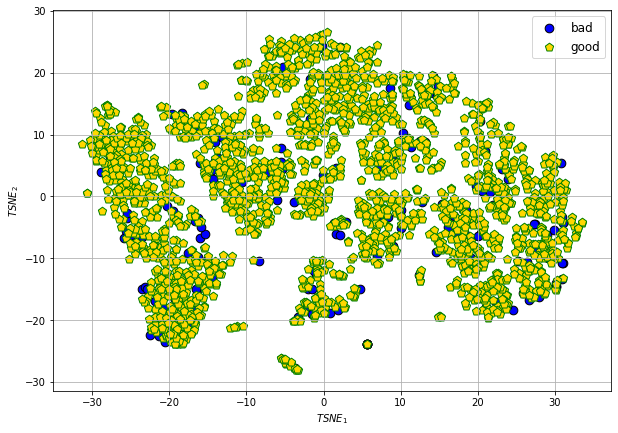

In [14]:
tsneNewData=doTSNE(myData.iloc[:,1::], 100, init='random')
fig=plt.figure(figsize=(10,7))
biplot_ez(tsneNewData, label, label_name, 'TSNE')

In [15]:
label1=np.array(label)

li=label1[0].T.tolist()

In [16]:

from sklearn.model_selection import train_test_split
training_data,test_data,training_data_label,test_data_label=train_test_split(myData.iloc[:,1::],li,test_size=0.2,random_state=42)

In [17]:
import time
from sklearn import neighbors
distance_=['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'jaccard']
neighbor_size=3
predicted_test_label=[]
for d in distance_:
    kNN = neighbors.KNeighborsClassifier(n_neighbors=neighbor_size, weights='distance', metric=d)
    kNN.fit(training_data, training_data_label)
    predicted_test_label.append( kNN.predict(test_data))
   # print("\n predicted test label under distance metric: " + d)
   # print(predicted_test_label)
   # print("\n")
    time.sleep(2)

In [18]:
len(predicted_test_label[0])


481

In [19]:
def accuracyKNN(predict_label,test_label):
    count=[0]*5
    for j in range(len(predict_label)):
        
          for i in range(len(test_label)):
                if(predict_label[j][i]==test_label[i]):
                    count[j]=count[j]+1
    accuracy=np.array(count)/len(test_label)
    print(accuracy)
        

In [20]:
accuracyKNN(predicted_test_label,test_data_label)

[0.9002079  0.91268191 0.88981289 0.9002079  0.92515593]


In [102]:
newMeasureResultknn=[]
for i in predicted_test_label:
    
    newMeasureResultknn.append(compute_measure(i, test_data_label))
df3=pd.DataFrame(newMeasureResultknn,columns=['acc','sen','spc','ppr','npr','F1'],index=distance_)
df3

,acc,sen,spc,ppr,npr,F1
euclidean,0.900208,0.027027,0.972973,0.076923,0.923077,0.040000
manhattan,0.912682,0.027027,0.986486,0.142857,0.924051,0.045455
chebyshev,0.889813,0.027027,0.961712,0.055556,0.922246,0.036364
minkowski,0.900208,0.027027,0.972973,0.076923,0.923077,0.040000
jaccard,0.925156,0.216216,0.984234,0.533333,0.937768,0.307692


In [22]:
from sklearn import svm
kernel_list=['linear','rbf','sigmoid']
predicted_label_combination=[]
for k in kernel_list:
    svm_learning_machine = svm.SVC(kernel=k, tol=0.0001, gamma=0.5, C=1)
    svm_learning_machine.fit(training_data, training_data_label)
    predicted_label_combination.append( svm_learning_machine.predict(test_data))
    #print("\n Predicted test data label vs. true test data label\n")
    #print(predicted_test_data_label)
    #print(test_data_label)

In [35]:
def compute_measure(predicted_label, true_label):
    t_idx = (predicted_label == true_label) # truely predicted
    f_idx = np.logical_not(t_idx) # falsely predicted
    p_idx = (true_label == True) # positive targets
    n_idx = np.logical_not(p_idx) # negative targets
    tp = np.sum( np.logical_and(t_idx, p_idx)) # TP
    tn = np.sum( np.logical_and(t_idx, n_idx)) # TN
# false positive: original negative but classified as positive
# false negative: original positive but classified as negative
    fp = np.sum(n_idx) - tn
    fn = np.sum(p_idx) - tp
    tp_fp_tn_fn_list=[]
    tp_fp_tn_fn_list.append(tp)
    tp_fp_tn_fn_list.append(fp)
    tp_fp_tn_fn_list.append(tn)
    tp_fp_tn_fn_list.append(fn)
    tp_fp_tn_fn_list=np.array(tp_fp_tn_fn_list)
    tp=tp_fp_tn_fn_list[0]
    fp=tp_fp_tn_fn_list[1]
    tn=tp_fp_tn_fn_list[2]
    fn=tp_fp_tn_fn_list[3]
    with np.errstate(divide='ignore'):
        sen = (1.0*tp)/(tp+fn)
    with np.errstate(divide='ignore'):
        spc = (1.0*tn)/(tn+fp)
    with np.errstate(divide='ignore'):
        ppr = (1.0*tp)/(tp+fp)
    with np.errstate(divide='ignore'):
        npr = (1.0*tn)/(tn+fn)
    acc = (tp+tn)*1.0/(tp+fp+tn+fn)
    f1=2*tp/(2*tp+fp+fn)
    ans=[]
    ans.append(acc)
    ans.append(sen)
    ans.append(spc)
    ans.append(ppr)
    ans.append(npr)
    ans.append(f1)
    #print(tp)
    #print(tn)
    #print(fn)
    #print(fp)
    return ans

In [36]:
test_data_label=np.array(test_data_label)

In [93]:
measureResult=[]
for i in predicted_label_combination:
    
    measureResult.append(compute_measure(i, test_data_label))
df1=pd.DataFrame(measureResult,columns=['acc','sen','spc','ppr','npr','F1'],index=kernel_list)
df1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


,acc,sen,spc,ppr,npr,F1
linear,0.883576,0.027027,0.954955,0.047619,0.921739,0.034483
rbf,0.923077,0.000000,1.000000,NaN,0.923077,0.000000
sigmoid,0.923077,0.000000,1.000000,NaN,0.923077,0.000000


In [40]:
   def getSamples(predicted_test_data_label, test_data_label):
        t_idx = (predicted_test_data_label == test_data_label) # truely predicted
        f_idx = np.logical_not(t_idx) # falsely predicted
        p_idx = (test_data_label == True) # positive targets
        n_idx = np.logical_not(p_idx) # negative targets
        
        a=np.logical_and(t_idx, p_idx) #tp
        idx1=np.where(a==True)
        tpDF=test_data.iloc[idx1[0],:] 
        
        b=np.logical_and(t_idx, n_idx) #tn 
        idx2=np.where(b==True)
        tnDF=test_data.iloc[idx2[0],:] 
        
        c=np.logical_and(p_idx, f_idx) #fn 
        idx3=np.where(c==True)
        fnDF=test_data.iloc[idx3[0],:] 
        
        d=np.logical_and(n_idx, f_idx) #fp 
        idx4=np.where(d==True)
        fpDF=test_data.iloc[idx4[0],:] 
        
        return tpDF,tnDF,fnDF,fpDF

In [41]:
a1,b1,c1,d1=getSamples(predicted_label_combination[0], test_data_label)
a2,b2,c2,d2=getSamples(predicted_label_combination[1], test_data_label)
a3,b3,c3,d3=getSamples(predicted_label_combination[2], test_data_label)

Resample

In [60]:
x_train,x_test,y_train,y_test=train_test_split(myData,li,test_size=0.2,random_state=42)

In [65]:
X_new=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)
bad=X_new[X_new.iloc[:,0]==1] 
good=X_new[X_new.iloc[:,0]==0]##1804 rows

In [70]:
#upsample
from sklearn.utils import resample
bad_upsampled = resample(bad,
                          replace=True, # sample with replacement
                          n_samples=len(good), # match number in majority class
                          random_state=27) # reproducible results
upsampled=pd.concat([good,bad_upsampled])

In [82]:
upsampled=upsampled.drop(columns=[0])

In [83]:
newLabel=upsampled.iloc[:,0]
training_data1,test_data1,training_data_label1,test_data_label1=train_test_split(upsampled.iloc[:,1::],newLabel,test_size=0.2,random_state=42)

In [84]:
#do knn again

distance_=['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'jaccard']
neighbor_size=3
predicted_test_label1=[]
for d in distance_:
    kNN = neighbors.KNeighborsClassifier(n_neighbors=neighbor_size, weights='distance', metric=d)
    kNN.fit(training_data1, training_data_label1)
    predicted_test_label1.append( kNN.predict(test_data1))
   # print("\n predicted test label under distance metric: " + d)
   # print(predicted_test_label)
   # print("\n")
    time.sleep(2)

In [89]:
newMeasureResult=[]
for i in predicted_test_label1:
    
    newMeasureResult.append(compute_measure(i, test_data_label1))
df=pd.DataFrame(newMeasureResult,columns=['acc','sen','spc','ppr','npr','F1'],index=kernel_list)
df

,acc,sen,spc,ppr,npr,F1
euclidean,0.929363,1.000000,0.866841,0.869231,1.000000,0.930041
manhattan,0.933518,1.000000,0.874674,0.875969,1.000000,0.933884
chebyshev,0.932133,1.000000,0.872063,0.873711,1.000000,0.932600
minkowski,0.929363,1.000000,0.866841,0.869231,1.000000,0.930041
jaccard,0.742382,0.575221,0.890339,0.822785,0.703093,0.677083


In [103]:
kernel_list=['linear','rbf','sigmoid']
predicted_label_combination1=[]
for k in kernel_list:
    svm_learning_machine = svm.SVC(kernel=k, tol=0.0001, gamma=0.5, C=1)
    svm_learning_machine.fit(training_data1, training_data_label1)
    predicted_label_combination1.append( svm_learning_machine.predict(test_data1))
    #print("\n Predicted test data label vs. true test data label\n")
    #print(predicted_test_data_label)
    #print(test_data_label)

In [104]:
newMeasureResultsvm=[]
for i in predicted_label_combination1:
    
    newMeasureResultsvm.append(compute_measure(i, test_data_label1))
df2=pd.DataFrame(newMeasureResultsvm,columns=['acc','sen','spc','ppr','npr','F1'],index=kernel_list)
df2

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


,acc,sen,spc,ppr,npr,F1
linear,0.650970,0.820059,0.501305,0.592751,0.758893,0.688119
rbf,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
sigmoid,0.469529,1.000000,0.000000,0.469529,NaN,0.639020


In [107]:
#undersample majority class
good_downsampled = resample(good,
                                replace = False, # sample without replacement
                                n_samples = len(bad), # match minority n
                                random_state = 27) # reproducible results
downsampled=pd.concat([good_downsampled,bad])
downsampled=downsampled.drop(columns=[0])
newLabel1=downsampled.iloc[:,0]
training_data2,test_data2,training_data_label2,test_data_label2=train_test_split(downsampled.iloc[:,1::],newLabel1,test_size=0.2,random_state=42)

In [108]:
kernel_list=['linear','rbf','sigmoid']
predicted_label_combination2=[]
for k in kernel_list:
    svm_learning_machine = svm.SVC(kernel=k, tol=0.0001, gamma=0.5, C=1)
    svm_learning_machine.fit(training_data2, training_data_label2)
    predicted_label_combination2.append( svm_learning_machine.predict(test_data2))
    #print("\n Predicted test data label vs. true test data label\n")
    #print(predicted_test_data_label)
    #print(test_data_label)

In [109]:
newMeasureResultsvm1=[]
for i in predicted_label_combination2:
    
    newMeasureResultsvm1.append(compute_measure(i, test_data_label2))
dff=pd.DataFrame(newMeasureResultsvm1,columns=['acc','sen','spc','ppr','npr','F1'],index=kernel_list)
dff

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


,acc,sen,spc,ppr,npr,F1
linear,0.708333,0.875000,0.541667,0.656250,0.8125,0.750000
rbf,0.479167,0.958333,0.000000,0.489362,0.0000,0.647887
sigmoid,0.500000,1.000000,0.000000,0.500000,NaN,0.666667


In [42]:
a1

,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
2269,0.903395,47,6,0.855534,4083,8,5,2,1,1


In [43]:
b1

,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
2179,0.129657,55,0,0.506093,16000,19,0,5,0,2
1525,0.000000,54,0,0.182844,3100,2,0,1,0,0
1377,0.060082,54,0,1464.000000,0,7,0,1,0,2
2372,0.087213,48,1,0.007306,5200,8,0,0,0,1
1125,0.215037,36,0,0.185504,3600,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
841,0.010439,34,0,0.678326,1600,5,0,1,0,0
1315,0.534216,57,0,0.692374,4667,10,0,1,0,1
2374,0.068646,42,0,0.247393,7000,11,0,1,0,0
1864,0.058388,56,0,0.190771,11615,6,0,2,0,1


In [44]:
c1

,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
210,0.450207,45,1,0.872131,7100,15,0,3,0,0
1908,0.573822,26,0,0.141717,5510,9,0,0,0,1
1592,0.537333,54,0,0.048878,4500,6,1,0,0,1
486,0.989933,36,1,0.408684,5250,15,0,1,0,2
1231,0.939416,45,0,0.126406,10758,11,0,0,0,1
237,0.678938,29,1,0.386051,2250,4,0,0,0,4
1112,0.844943,71,2,0.950508,6000,16,2,1,0,0
1288,0.990230,50,5,0.265717,8000,12,0,0,0,0
889,0.056540,84,0,0.577059,1978,9,0,1,0,0
2136,1.048625,39,4,0.226549,5084,5,2,0,1,4


In [45]:
d1


,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
1938,0.040098,69,0,36.000000,1,8,0,0,0,0
111,0.176673,42,0,432.000000,1,4,0,1,0,3
1582,0.410705,53,4,0.807445,2175,8,0,1,0,2
1805,0.950347,65,1,1.342416,1100,11,0,1,0,0
629,0.995002,37,1,1.595337,1200,7,0,1,0,2
949,0.232519,50,1,10.960396,100,13,0,1,0,2
2142,0.144571,30,0,0.474407,800,6,0,0,0,1
2222,0.000000,23,0,0.000000,1,1,0,0,0,0
430,0.031425,61,0,1.656895,1500,24,0,2,0,1
1477,0.155746,31,2,0.745442,1480,11,0,0,0,0


In [46]:
a2

,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees


In [47]:
b2

,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
2179,0.129657,55,0,0.506093,16000,19,0,5,0,2
1525,0.000000,54,0,0.182844,3100,2,0,1,0,0
1377,0.060082,54,0,1464.000000,0,7,0,1,0,2
2372,0.087213,48,1,0.007306,5200,8,0,0,0,1
1125,0.215037,36,0,0.185504,3600,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
841,0.010439,34,0,0.678326,1600,5,0,1,0,0
1315,0.534216,57,0,0.692374,4667,10,0,1,0,1
2374,0.068646,42,0,0.247393,7000,11,0,1,0,0
1864,0.058388,56,0,0.190771,11615,6,0,2,0,1


In [48]:
c2

,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
210,0.450207,45,1,0.872131,7100,15,0,3,0,0
1908,0.573822,26,0,0.141717,5510,9,0,0,0,1
1592,0.537333,54,0,0.048878,4500,6,1,0,0,1
486,0.989933,36,1,0.408684,5250,15,0,1,0,2
1231,0.939416,45,0,0.126406,10758,11,0,0,0,1
237,0.678938,29,1,0.386051,2250,4,0,0,0,4
1112,0.844943,71,2,0.950508,6000,16,2,1,0,0
1288,0.990230,50,5,0.265717,8000,12,0,0,0,0
889,0.056540,84,0,0.577059,1978,9,0,1,0,0
2136,1.048625,39,4,0.226549,5084,5,2,0,1,4


In [49]:
d2

,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees


In [50]:
a3

,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees


In [51]:
b3

,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
2179,0.129657,55,0,0.506093,16000,19,0,5,0,2
1525,0.000000,54,0,0.182844,3100,2,0,1,0,0
1377,0.060082,54,0,1464.000000,0,7,0,1,0,2
2372,0.087213,48,1,0.007306,5200,8,0,0,0,1
1125,0.215037,36,0,0.185504,3600,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
841,0.010439,34,0,0.678326,1600,5,0,1,0,0
1315,0.534216,57,0,0.692374,4667,10,0,1,0,1
2374,0.068646,42,0,0.247393,7000,11,0,1,0,0
1864,0.058388,56,0,0.190771,11615,6,0,2,0,1


In [52]:
c3

,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
210,0.450207,45,1,0.872131,7100,15,0,3,0,0
1908,0.573822,26,0,0.141717,5510,9,0,0,0,1
1592,0.537333,54,0,0.048878,4500,6,1,0,0,1
486,0.989933,36,1,0.408684,5250,15,0,1,0,2
1231,0.939416,45,0,0.126406,10758,11,0,0,0,1
237,0.678938,29,1,0.386051,2250,4,0,0,0,4
1112,0.844943,71,2,0.950508,6000,16,2,1,0,0
1288,0.990230,50,5,0.265717,8000,12,0,0,0,0
889,0.056540,84,0,0.577059,1978,9,0,1,0,0
2136,1.048625,39,4,0.226549,5084,5,2,0,1,4


In [53]:
d3

,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
